In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import pymysql

#Datos de conexión
usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la conexión
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("Conexión correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtener el nombre de les tablas
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for tabla in nombre_tablas:
    query=f"SELECT * FROM {tabla}"
    
    try:
        df[tabla] = pd.read_sql(query, cnx)
        print(f"Tabla '{tabla}' cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}':{e}")
  
# Cerrrar la conexión
cnx.close()

Conexión correcta
Tabla 'BANK_marketing' cargada correctamente.
Tabla 'BANK_marketing131024' cargada correctamente.
Tabla 'BANK_marketing211024' cargada correctamente.
Tabla 'BANK_marketing_backup_211024' cargada correctamente.


In [2]:
plt.style.use("seaborn-v0_8-deep")

In [3]:
df_bank = df['BANK_marketing211024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan','deposit']]

In [6]:
df_finanzas.head()

,id,age,job,marital,education,default,balance,housing,loan,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,1
1,2,59,admin.,married,secondary,0,2343,1,0,1
2,3,56,admin.,married,secondary,0,45,0,0,1
3,4,41,technician,married,secondary,0,1270,1,0,1
4,5,55,services,married,secondary,0,2476,1,0,1


In [7]:
df_finanzas.describe()

,id,age,default,balance,housing,loan,deposit
count,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.00000
mean,13166.088216,41.278905,0.014830,1522.062607,0.472882,0.132668,0.47357
std,7642.948371,11.965048,0.120875,3254.107270,0.499274,0.339222,0.49931
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000,0.00000
25%,6541.500000,32.000000,0.000000,123.000000,0.000000,0.000000,0.00000
50%,13082.000000,39.000000,0.000000,543.000000,0.000000,0.000000,0.00000
75%,19842.500000,49.000000,0.000000,1704.000000,1.000000,0.000000,1.00000
max,26383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000,1.00000


In [4]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
dtype: int64

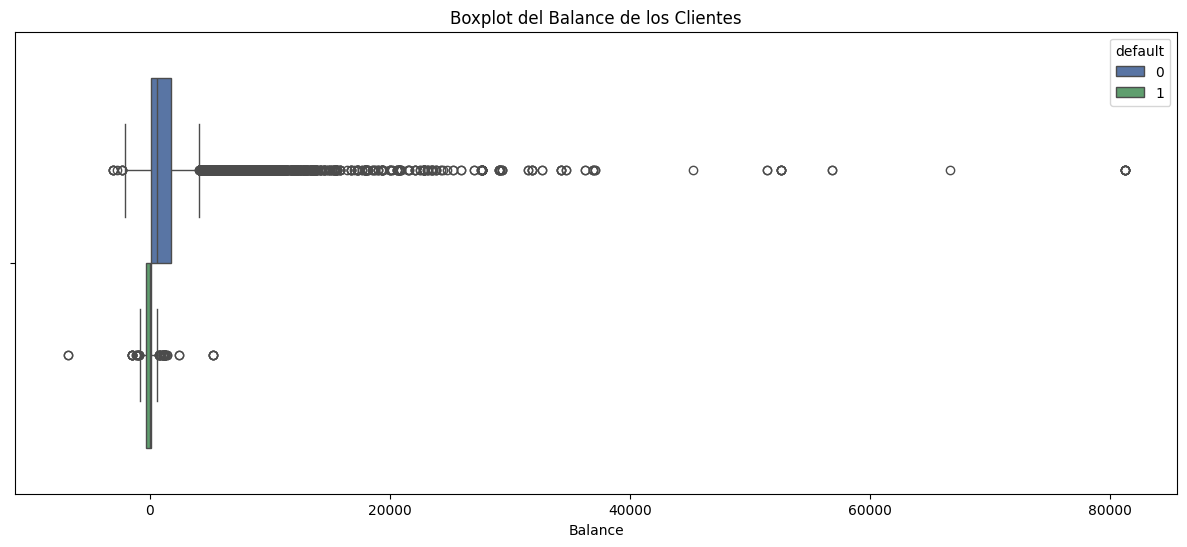

In [6]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_finanzas, x = "balance", hue="default")

plt.title("Boxplot del Balance de los Clientes")
plt.xlabel("Balance")

plt.show()

In [7]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q

Q1, Q2, Q3, min_Q, max_Q = cuartiles(df_finanzas['balance'])

print(f"Minimum: {min_Q}\n"
      f"Q1: {Q1}\n"
      f"Q2: {Q2}\n"
      f"Q3: {Q3}\n"
      f"Maximum: {max_Q}")

Minimum: -2248.5
Q1: 123.0
Q2: 543.0
Q3: 1704.0
Maximum: 4075.5


In [8]:
def clasificacion_clientes (balance):
    if balance < min_Q:
        return "muy bajo"
    elif balance < Q1:
        return "bajo"
    elif balance < Q2:
        return "medio-bajo"
    elif balance < Q3:
        return "medio-alto"
    elif balance < max_Q:
        return "alto"
    else:
        return "muy alto"
    
df_finanzas["descripcion_balance"] = df_finanzas["balance"].apply(clasificacion_clientes)


order = ['muy bajo', 'bajo', 'medio-bajo', 'medio-alto', 'alto', 'muy alto']
df_finanzas['descripcion_balance'] = pd.Categorical(df_finanzas['descripcion_balance'], categories=order, ordered=True)
df_finanzas = df_finanzas.sort_values(by='descripcion_balance').reset_index(drop=True)


C:\Users\Natalya\AppData\Local\Temp\ipykernel_1764\1133627140.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas["descripcion_balance"] = df_finanzas["balance"].apply(clasificacion_clientes)
C:\Users\Natalya\AppData\Local\Temp\ipykernel_1764\1133627140.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas['descripcion_balance'] = pd.Categorical(df_finanzas['descripcion_balance'], categories=order, ordered=True)


In [9]:
df_finanzas

,id,age,job,marital,education,default,balance,housing,loan,deposit,descripcion_balance
0,10644,52,management,married,tertiary,0,-2712,1,1,0,muy bajo
1,22277,51,management,divorced,tertiary,0,-2282,1,1,0,muy bajo
2,14901,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo
3,24039,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo
4,6799,49,management,married,tertiary,1,-6847,0,1,0,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...
26158,22252,43,self-employed,married,secondary,0,14144,1,0,1,muy alto
26159,24319,37,management,married,tertiary,0,5106,0,0,1,muy alto
26160,1386,59,retired,married,tertiary,0,9676,0,0,1,muy alto
26161,2687,46,management,married,tertiary,0,7331,0,0,1,muy alto


In [10]:
# Definir el rango de agrupación (cada 500)
bins = range(-7000, 5000, 250)  

# Crear una nueva columna que contenga los rangos
df_finanzas['rango'] = pd.cut(df_finanzas['balance'], bins)

In [11]:
resultado = df_finanzas.groupby("rango")['default'].mean() * 100
resultado = resultado.reset_index(name="% incumplimiento")

C:\Users\Natalya\AppData\Local\Temp\ipykernel_1764\246168475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = df_finanzas.groupby("rango")['default'].mean() * 100


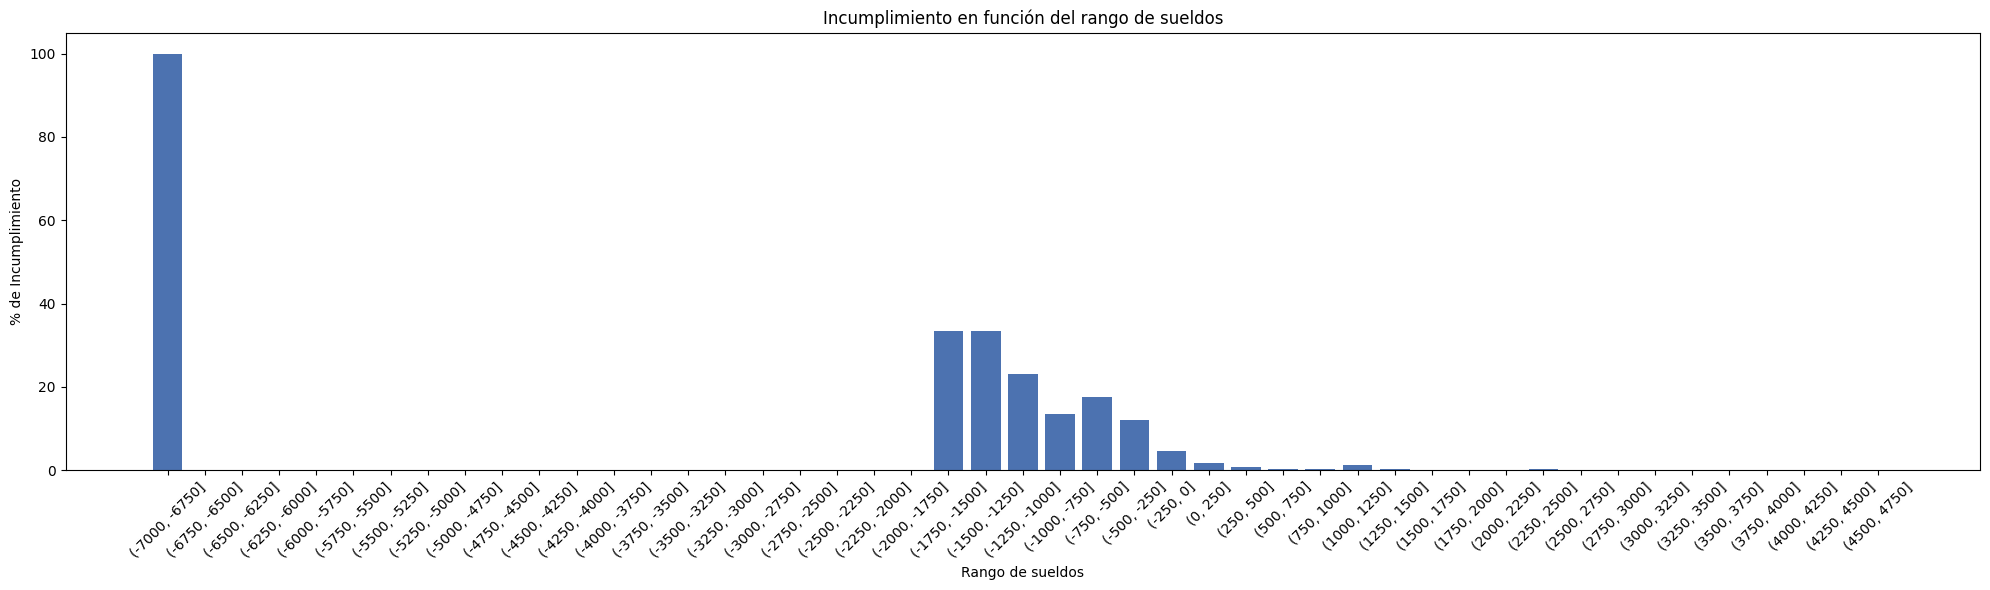

In [12]:
# Creamos el gráfico de barras
plt.figure(figsize=(20,6))
plt.bar(resultado['rango'].astype(str), resultado['% incumplimiento'])

# Añadir título y etiquetas
plt.title('Incumplimiento en función del rango de sueldos')
plt.xlabel('Rango de sueldos')
plt.ylabel('% de Incumplimiento')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [13]:
df_finanzas.query("balance < -1750")

,id,age,job,marital,education,default,balance,housing,loan,deposit,descripcion_balance,rango
0,10644,52,management,married,tertiary,0,-2712,1,1,0,muy bajo,"(-2750, -2500]"
1,22277,51,management,divorced,tertiary,0,-2282,1,1,0,muy bajo,"(-2500, -2250]"
2,14901,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo,"(-3250, -3000]"
3,24039,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo,"(-3250, -3000]"
4,6799,49,management,married,tertiary,1,-6847,0,1,0,muy bajo,"(-7000, -6750]"
5,19367,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo,"(-3250, -3000]"
6,14965,51,management,divorced,tertiary,0,-2282,1,1,0,muy bajo,"(-2500, -2250]"
7,6390,51,management,divorced,tertiary,0,-2282,1,1,0,muy bajo,"(-2500, -2250]"
8,1527,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo,"(-3250, -3000]"
9,18956,51,management,divorced,tertiary,0,-2282,1,1,0,muy bajo,"(-2500, -2250]"


In [14]:
# Crear un filtro para seleccionar los rangos entre -2000 y 1500
filtro = (resultado['rango'].apply(lambda x: x.left >= -2000 and x.right <= 1500))

# Aplicar el filtro al DataFrame resultado
resultado_filtrado = resultado[filtro]

# Mostrar el resultado
print(resultado_filtrado)


             rango  % incumplimiento
20  (-2000, -1750]          0.000000
21  (-1750, -1500]         33.333333
22  (-1500, -1250]         33.333333
23  (-1250, -1000]         23.076923
24   (-1000, -750]         13.580247
25    (-750, -500]         17.647059
26    (-500, -250]         12.153518
27       (-250, 0]          4.564473
28        (0, 250]          1.707405
29      (250, 500]          0.852820
30      (500, 750]          0.250209
31     (750, 1000]          0.342270
32    (1000, 1250]          1.323408
33    (1250, 1500]          0.211193


C:\Users\Natalya\AppData\Local\Temp\ipykernel_1764\3521006404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_filtrado['rango_str'] = resultado_filtrado['rango'].astype(str)


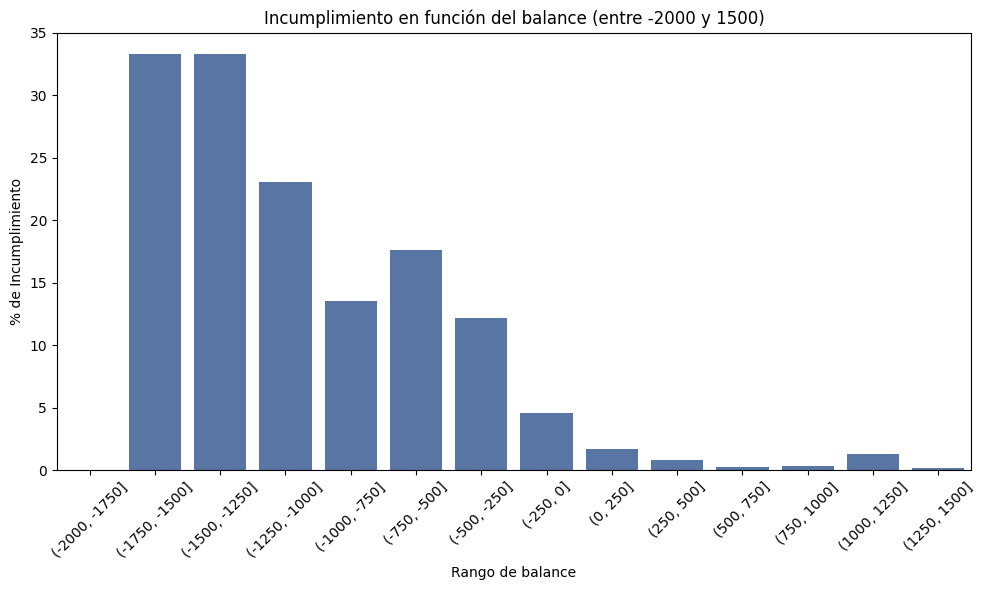

In [15]:
# Convertir los intervalos a cadenas para las etiquetas del gráfico
resultado_filtrado['rango_str'] = resultado_filtrado['rango'].astype(str)

# Crear el gráfico con los datos filtrados
plt.figure(figsize=(10,6))
sns.barplot(x='rango_str', y='% incumplimiento', data=resultado_filtrado)

# Añadir título y etiquetas
plt.title('Incumplimiento en función del balance (entre -2000 y 1500)')
plt.xlabel('Rango de balance')
plt.ylabel('% de Incumplimiento')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Random Forest

In [23]:
%pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Supongamos que df_finanzas es tu DataFrame con los datos
X = df_finanzas[['balance']]  # Variable explicativa
y = df_finanzas['default']    # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Predecir el estado de incumplimiento para el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Generar un informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7723
           1       0.68      0.24      0.35       126

    accuracy                           0.99      7849
   macro avg       0.83      0.62      0.67      7849
weighted avg       0.98      0.99      0.98      7849



1. Precision (Precisión):
* Clase 0 (no moroso): 0.99. Esto significa que el 99% de los clientes que el modelo predijo como no morosos realmente no lo son. Es un excelente resultado.
* Clase 1 (moroso): 0.68. Aquí, el 68% de los clientes que el modelo predijo como morosos realmente lo son. Aunque no está mal, deja espacio para mejorar, ya que se producen falsos positivos (clientes clasificados como morosos que no lo son).

2. Recall (Sensibilidad o Tasa de Verdaderos Positivos):
* Clase 0 (no moroso): 1.00. El modelo detecta correctamente todos los clientes no morosos, lo que indica una alta capacidad para identificar correctamente a quienes no incumplen.
* Clase 1 (moroso): 0.24. Solo el 24% de los clientes que efectivamente incumplen son correctamente identificados como morosos. Esto significa que el modelo está perdiendo muchos casos de morosidad (falsos negativos), lo cual es un problema importante en el contexto de gestión de riesgos.

3. F1-Score:
* Clase 0 (no moroso): 0.99. El F1-Score es una medida que equilibra precisión y recall. Para la clase 0, es casi perfecto (0.99), lo que indica que el modelo maneja muy bien a los clientes no morosos.
* Clase 1 (moroso): 0.35. Un F1-Score de 0.35 para los morosos refleja un equilibrio pobre entre precisión y recall. El bajo recall está afectando este valor, lo que sugiere que el modelo no está capturando adecuadamente a los clientes morosos.

4. Support:
* Clase 0 (no moroso): 7723
* Clase 1 (moroso): 126

Aquí vemos un claro desequilibrio en las clases: hay muchos más clientes no morosos (7723) en comparación con los morosos (126). Este desbalance de clases puede afectar negativamente al modelo, ya que tiende a enfocarse más en predecir la clase mayoritaria (no morosos).

5. Accuracy (Exactitud):
El modelo tiene una exactitud general del 99%, lo cual suena muy alto, pero en realidad está sesgado por el desbalance de clases. Dado que hay muy pocos morosos en comparación con no morosos, un modelo que simplemente predijera siempre "no moroso" podría obtener una alta exactitud.

Conclusiones:

* Desempeño en la clase 0 (no moroso): El modelo es excelente para identificar a los clientes no morosos, con un recall perfecto (1.00) y una precisión casi perfecta (0.99).
* Desempeño en la clase 1 (moroso): El modelo no está capturando bien a los clientes morosos, con un recall muy bajo (0.24). Esto significa que muchos clientes que en realidad son morosos están siendo clasificados incorrectamente como no morosos.

Desbalance de clases: Este es probablemente el mayor problema. La clase morosa tiene muy pocos ejemplos en comparación con la clase no morosa, lo que lleva a que el modelo se enfoque más en predecir la clase mayoritaria.


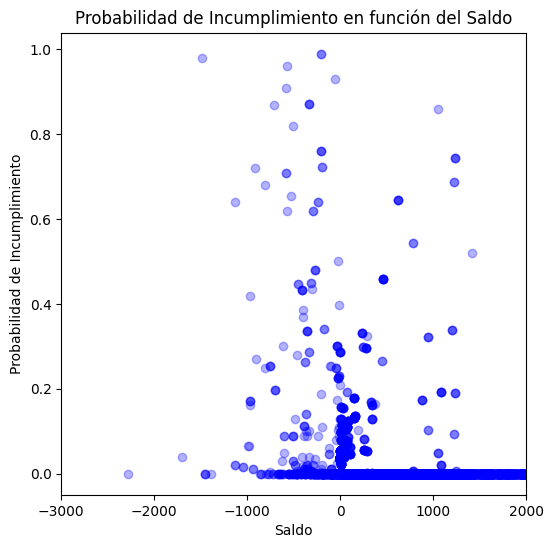

In [19]:
# Predecir la probabilidad de incumplimiento (segunda columna de la predicción de probabilidad)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Crear un gráfico de dispersión para mostrar la relación entre saldo y probabilidad de incumplimiento
plt.figure(figsize=(6, 6))
plt.scatter(X_test['balance'], y_pred_proba, alpha=0.3, color='b')
plt.title('Probabilidad de Incumplimiento en función del Saldo')
plt.xlabel('Saldo')
plt.xlim(-3000,2000)
plt.ylabel('Probabilidad de Incumplimiento')
plt.show()

In [20]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

results = pd.DataFrame({'saldo': X_test['balance'], 'probabilidad_incumplimiento': y_prob})

# Definir el rango de agrupación (por ejemplo, cada 250)
bins = range(-3000, 2000, 250)  # Ajusta el rango según sea necesario
results['rango'] = pd.cut(results['saldo'], bins)

# Agrupar por rango y calcular la probabilidad media
resultado = results.groupby('rango')['probabilidad_incumplimiento'].mean().reset_index()
resultado['probabilidad_incumplimiento'] = resultado['probabilidad_incumplimiento'].fillna(0)


C:\Users\Natalya\AppData\Local\Temp\ipykernel_1764\4060153169.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = results.groupby('rango')['probabilidad_incumplimiento'].mean().reset_index()


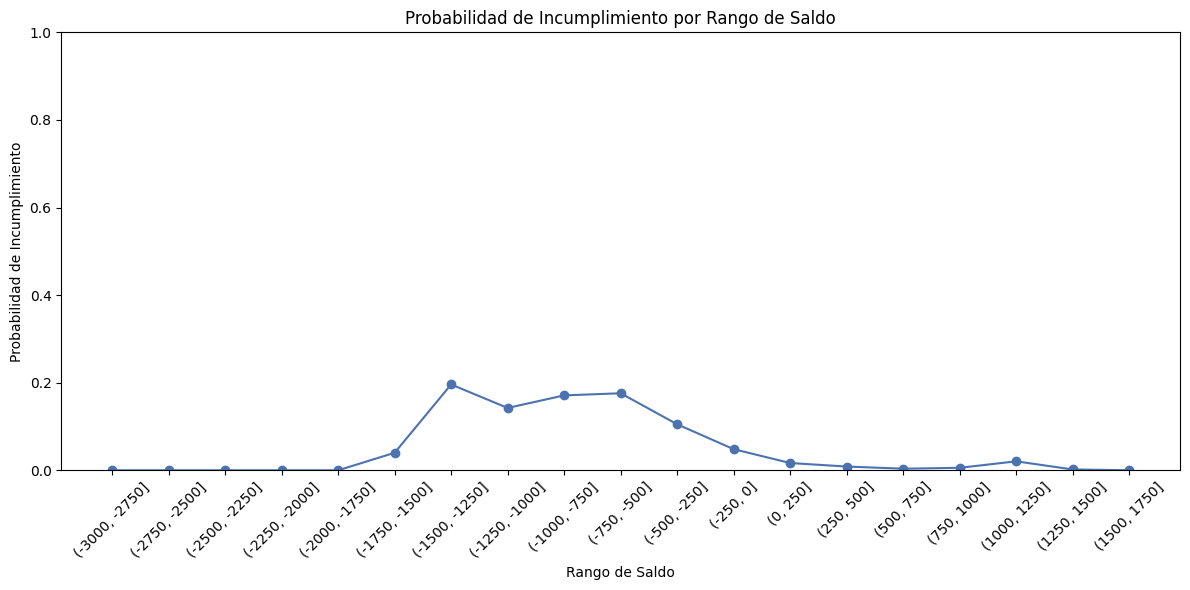

In [21]:
# Visualizar los resultados con un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(resultado['rango'].astype(str), resultado['probabilidad_incumplimiento'], marker='o', linestyle='-')

plt.title('Probabilidad de Incumplimiento por Rango de Saldo')
plt.xlabel('Rango de Saldo')
plt.ylabel('Probabilidad de Incumplimiento')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.ylim(0, 1)  # Establecer el límite del eje y entre 0 y 1

plt.tight_layout()
plt.show()

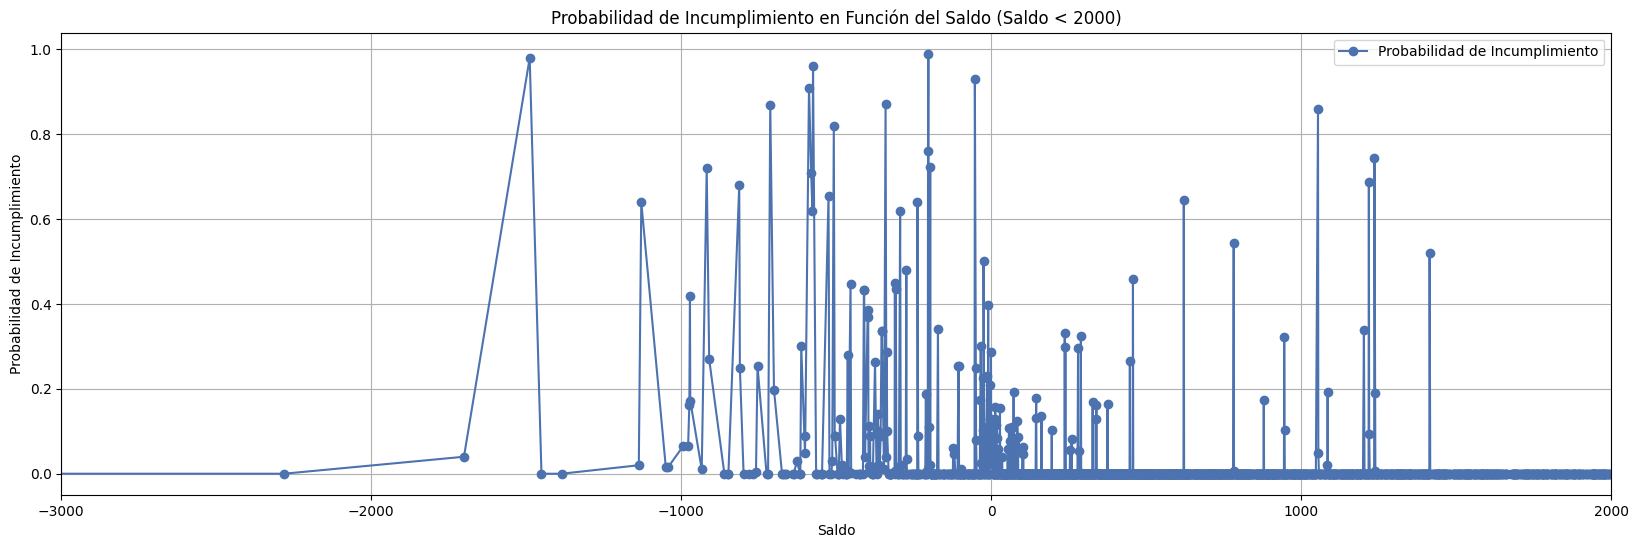

In [22]:
# Crear un DataFrame con saldos y probabilidades de incumplimiento
results = pd.DataFrame({'saldo': X_test['balance'], 'probabilidad_incumplimiento': y_prob})

# Agrupar por saldo y calcular la probabilidad media de incumplimiento
saldo_probabilidad = results.groupby('saldo').mean().reset_index()

saldo_filtrado = saldo_probabilidad[saldo_probabilidad['saldo'] < 2000].copy()

plt.figure(figsize=(20, 6))
plt.plot(saldo_filtrado['saldo'], saldo_filtrado['probabilidad_incumplimiento'], marker='o', label='Probabilidad de Incumplimiento')
plt.xlabel('Saldo')
plt.ylabel('Probabilidad de Incumplimiento')
plt.title('Probabilidad de Incumplimiento en Función del Saldo (Saldo < 2000)')

# plt.axhline(y=0.5, color='r', linestyle='--', label='Umbral 0.5')  # Línea de umbral

plt.xlim(-3000, 2000)
plt.grid()
plt.legend()
plt.show()
